In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pylab
import matplotlib.pyplot as plt
import numpy as np
import glob
import time
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import solarplanets as sp

This code needs exodata
- pip install exodata

In [3]:
import exodata
### exodata
exocat = exodata.load_db_from_url()
#databaseLocation = '/home/kawahara/open_exoplanet_catalogue/systems/'
#exocat = exodata.OECDatabase(databaseLocation)

In [4]:
def get_quantity(name):
    a=exocat.searchPlanet(name).a.magnitude
    e=exocat.searchPlanet(name).e
    if e != e:
        e=0.0
    omega=exocat.searchPlanet(name).periastron#.magnitude
    if omega != omega:
        omega=0.0
    return np.array([a,e,omega])

In [5]:
# you can know what quantity is available by 
# dir(exocat.searchPlanet("HD 209458 b"))

In [6]:
get_quantity("Jupiter")

array([  5.20248019,   0.0485359 ,  14.27495244])

In [7]:
def rconic(par):
    a,e,omega=par
    t=np.linspace(0,2*np.pi,1000)
    f=t-omega/(np.pi)
    r=a*(1-e**2)/(1+e*np.cos(f))
    x=r*np.cos(t)
    y=r*np.sin(t)
    return x,y

In [8]:
def plot_orb(ax,plt,name,title="",a=1.1,ls="solid",c="black",alpha=1,lab=True):
    x,y=rconic(get_quantity(name))
    pylab.ylim(-a,a)
    pylab.xlim(-a,a)
    if lab:
        ax.plot(x,y,label=name,lw=2,ls=ls,color=c,alpha=alpha)
    else:
        ax.plot(x,y,lw=2,ls=ls,color=c,alpha=alpha)
    if title!="":
        plt.title(title+", "+name,fontsize=16)   
    ax.set_aspect(1.0/ax.get_data_ratio())


In [10]:
def plot_solar_system(ax,plt,a=1.1,ls="dotted",c="gray",al=0.5):
    plot_orb(ax,plt,"Mercury",ls=ls,c=c,alpha=al,lab=False)
    if a>0.37 and a < 10:
        ax.text(0,-0.37,"Me",color="gray")
    plot_orb(ax,plt,"Venus",ls=ls,c=c,alpha=al,lab=False)
    if a>0.75 and a < 10:
        ax.text(0,-0.75,"V",color="gray")
    plot_orb(ax,plt,"Earth",ls=ls,c=c,alpha=al,lab=False)
    if a>=1.0 and a < 10:
        ax.text(0,-1.005,"E",color="gray")
    plot_orb(ax,plt,"Mars",ls=ls,c=c,alpha=al,lab=False)
    if a>3 and a < 10:
        ax.text(0,-3,"Ma",color="gray")        
    plot_orb(ax,plt,"Jupiter",ls=ls,c=c,alpha=al,lab=False)
    if a>5:
        ax.text(0,-5,"J",color="gray")      
    plot_orb(ax,plt,"Saturn",ls=ls,c=c,alpha=al,lab=False)
    if a>12:
        ax.text(0,-12,"S",color="gray")    
    plot_orb(ax,plt,"Neptune",ls=ls,c=c,alpha=al,lab=False)
    if a>22:
        ax.text(0,-22,"N",color="gray")
    plot_orb(ax,plt,"Uranus",ls=ls,c=c,alpha=al,lab=False)    
    if a>35:
        ax.text(0,-35,"U",color="gray")
    pylab.ylim(-a,a)
    pylab.xlim(-a,a)

/home/kawahara/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


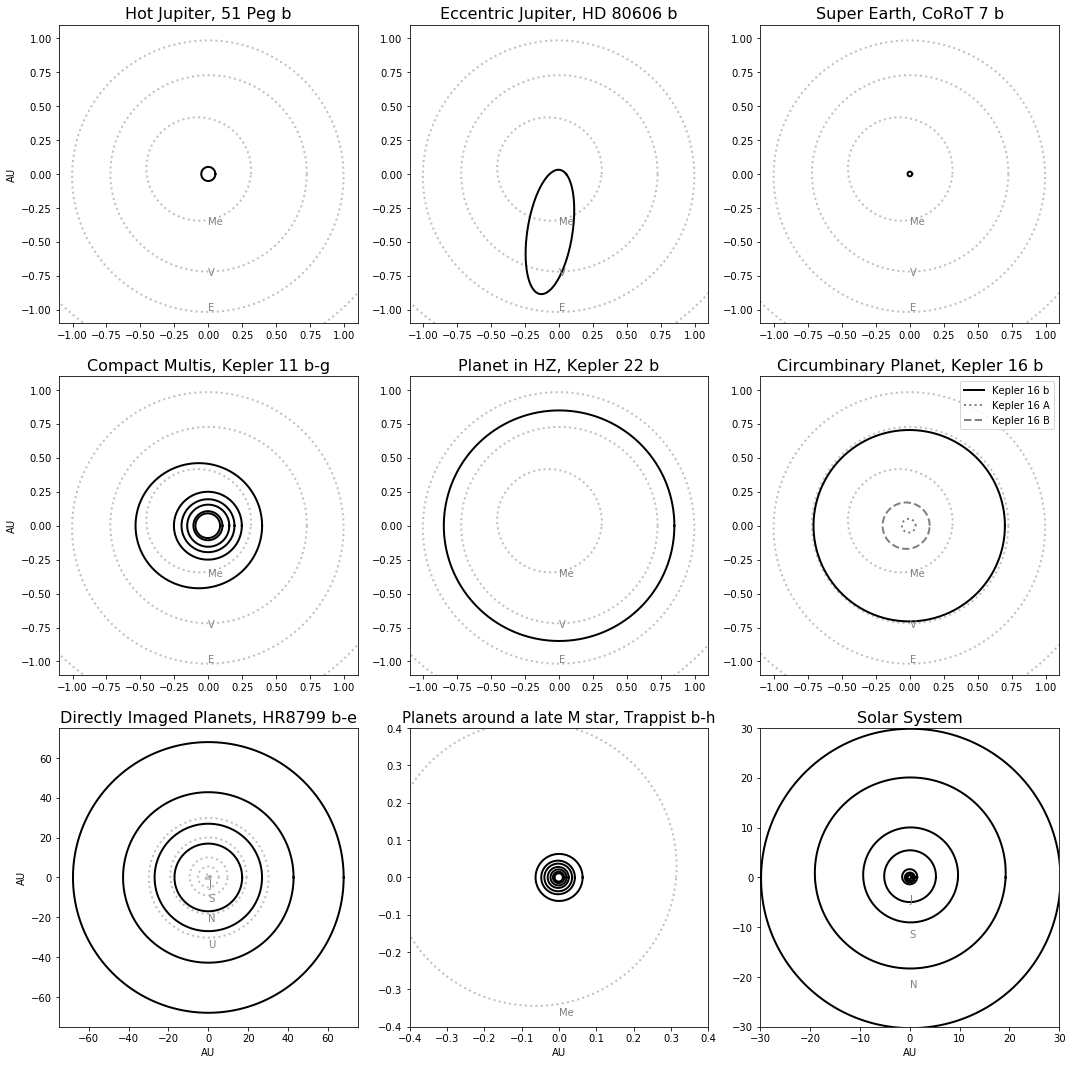

In [13]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(331)
plot_solar_system(ax,plt)
plot_orb(ax,plt,"51 Peg b","Hot Jupiter")
plt.ylabel("AU")

ax=fig.add_subplot(332)
plot_solar_system(ax,plt)
plot_orb(ax,plt,"HD 80606 b","Eccentric Jupiter")

ax=fig.add_subplot(333)
plot_solar_system(ax,plt)
plot_orb(ax,plt,"CoRoT 7 b","Super Earth")

ax=fig.add_subplot(334)
plot_solar_system(ax,plt)
plot_orb(ax,plt,"Kepler 11 b")
plot_orb(ax,plt,"Kepler 11 c")
plot_orb(ax,plt,"Kepler 11 d")
plot_orb(ax,plt,"Kepler 11 e")
plot_orb(ax,plt,"Kepler 11 f")
plot_orb(ax,plt,"Kepler 11 g")
plt.title("Compact Multis, Kepler 11 b-g",fontsize=16)
plt.ylabel("AU")

ax=fig.add_subplot(335)
plot_solar_system(ax,plt)
plot_orb(ax,plt,"Kepler 22 b","Planet in HZ")

ax=fig.add_subplot(336)
plot_solar_system(ax,plt)
plot_orb(ax,plt,"Kepler 16 b","Circumbinary Planet")
MA=0.6897 
MB=0.20255
K16A=[0.224*(MB/(MA+MB)),0.159,0]
K16B=[0.224*(MA/(MA+MB)),0.159,0]

x,y=rconic(K16A)
ax.plot(x,y,lw=2,ls="dotted",color="gray",label="Kepler 16 A")
x,y=rconic(K16B)
ax.plot(x,y,lw=2,ls="dashed",color="gray",label="Kepler 16 B")
ax.legend()

ax=fig.add_subplot(337)
plot_solar_system(ax,plt,a=75)
plot_orb(ax,plt,"HR8799 b")
plot_orb(ax,plt,"HR8799 c")
plot_orb(ax,plt,"HR8799 d")
plot_orb(ax,plt,"HR8799 e",a=75)
plt.title("Directly Imaged Planets, HR8799 b-e",fontsize=16)
plt.xlabel("AU")
plt.ylabel("AU")

ax=fig.add_subplot(338)
plot_solar_system(ax,plt,a=0.4)
plot_orb(ax,plt,"Trappist1 b")
plot_orb(ax,plt,"Trappist1 c")
plot_orb(ax,plt,"Trappist1 d")
plot_orb(ax,plt,"Trappist1 e")
plot_orb(ax,plt,"Trappist1 f")
plot_orb(ax,plt,"Trappist1 g")
plot_orb(ax,plt,"Trappist1 h",a=0.4)
plt.title("Planets around a late M star, Trappist b-h",fontsize=15)
plt.xlabel("AU")

ax=fig.add_subplot(339)
plot_solar_system(ax,plt,a=30,ls="solid",c="black",al=1)
plt.title("Solar System",fontsize=16)
plt.xlabel("AU")
plt.show()